# Проект: Анализ убытков и  эффективности маркетинговой стратегии 

# Описание проекта

Компания столкнулась с убытками, которые продолжаются уже несколько месяцев. Необходимо выяснить причины сложившейся ситуации и помочь компании выйти в плюс. 

Необходимо провести исследование пользователей развлекательного приложения и маркетинговой стратегии. Выяснить, какими устройствами  пользуются, сколько стоит привлечение пользователей из разных рекламных каналов, сколько денег приносит каждый пользователь и в чем причина убытков несмотря на оогромные вложения в рекламу.

**Задачи проекта:**
- Изучить пользователей и определить предпочтения платящих пользователей;
- Исследовать рекламные каналы привлечения пользователей;
- Определить стоимость привлечения и доход от каждого пользователя;
- Оценить окупаемость рекламы;
- Определить уровень конверсии и удержания пользователей;
- Разобраться в причинах убытков и дать рекомендации отделу маркетинга для улучшения ситуации.

# Описание данных

Предоставлены данные за период с 1 мая по 27 октября 2019 года.

Файл `visits_info_short.csv` содержит данне о посещениях пользователей:
- `User Id` — уникальный идентификатор пользователя;
- `Region` — страна пользователя;
- `Device` — тип устройства пользователя;
- `Channel` — идентификатор источника перехода;
- `Session Start` — дата и время начала сессии;
- `Session End` — дата и время окончания сессии.

Файл `orders_info_short.csv` содержит данные о покупках пользователей:
- `User Id` — уникальный идентификатор пользователя;
- `Event Dt` — дата и время покупки;
- `Revenue` — сумма заказа.

Файл `costs_info_short.csv` содержит данные о рекламных расходах компании:
- `dt` — дата проведения рекламной кампании;
- `Channel` — идентификатор рекламного источника;
- `costs` — расходы на эту кампанию.

# Глоссарий

- CAC — стоимость привлечения одного клиента;
- ROI — коэффициент, показывающий прибыльность инвестиций;
- LTV — пожизненная ценность клиента;
- CR — конверсия;
- CRR — показатель удержания клиентов.
 
# План работы

[1. Загрузка данных](#data_load)
    
    1.1. Загрузка библиотек
	1.2. Загрузка данных
[2. Предобработка данных](#preprocessing) 

	2.1. Общая предобработка
	2.2. Повышение качества данных
		2.2.1. Переименование столбцов
		2.2.2. Изменение типа данных
		2.2.3. Добавление новых столбцов
[3. Исследовательский анализ данных](#analysis)

	3.1. Применение функций для расчета и анализа
		3.1.1. Функция для создания пользовательских профилей (get_profiles)
		3.1.2. Функция для расчёта удержания (get_retention)
		3.1.3. Функция для расчета конверсии (get_conversion)
		3.1.4. Функция для расчёта LTV и ROI (get_ltv)
		3.1.5. Функция для сглаживания фрейма (filter_data)
		3.1.6. Функция для визуализации удержания (plot_retention)
		3.1.7. Функция для визуализации LTV и ROI (plot_ltv_roi)
	3.2. Изучение профилей пользователей
		3.2.1. География пользователей
		3.2.2. Устройства пользователей
	3.3. Изучение рекламных каналов 
	3.4. Исследование маркетинга
		3.4.1. Общие расходы на маркетинг
		3.4.2. Расходы на рекламные каналы
		3.4.3. Распределение расходов по временным периодам
		3.4.4. Средняя стоимость привлечения пользователя
		3.4.5. Оценка окупаемости рекламы (LTV, ROI, CAC)
			3.4.5.1. Окупаемость рекламы по странам
			3.4.5.2. Окупаемость рекламы по устройствам
			3.4.5.3. Окупаемость рекламы по рекламным каналам
		3.4.6. Анализ конверсии (CR)
			3.4.6.1. Конверсия пользователей
			3.4.6.2. Конверсия по странам
			3.4.6.3. Конверсия по устройствам
			3.4.6.4. Конверсия по рекламным каналам
		3.4.7. Анализ удержания (CRR)
			3.4.7.1. Удержание пользователей
			3.4.7.2. Удержание по странам
			3.4.7.3. Удержание по устройствам
			3.4.7.4. Удержание по рекламным каналам
            
[4. Заключение и рекомендации](#conclusion)

# 1. Загрузка данных <a id="#data_load"></a> 

## 1.1. Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

## 1.2. Загрузка данных

In [2]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

# 2. Предобработка данных <a id="#preprocessing"></a> 

## 2.1. Общая предобработка

Применим функцию для предварительной обработки данных. Она предоставит нам общую информацию, количество пропущенных значений и количество дубликатов в данных.

In [3]:
def preprocessing(x):
    print('Общая информация:')
    display(x.info())

    print('Количество пропусков:')
    display(x.isna().sum())
    
    print('Наличие дубликатов:')
    display(x.duplicated().sum())

In [4]:
preprocessing(visits)
display(visits.head());

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Количество пропусков:


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Наличие дубликатов:


0

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [5]:
preprocessing(orders)
display(orders.head());

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Количество пропусков:


User Id     0
Event Dt    0
Revenue     0
dtype: int64

Наличие дубликатов:


0

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [6]:
preprocessing(costs)
display(costs.head());

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Количество пропусков:


dt         0
Channel    0
costs      0
dtype: int64

Наличие дубликатов:


0

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

В ходе изучения данных выявили следующие проблемы:

1. Некорректное оформление столбцов: они записаны в разных регистрах;
2. Несоответствие типов данных:
    - visits в столбцах 'session_start' и 'session_end';
    - orders в столбце 'event_dt';
    - costs в столбце 'dt'.
    
Положительный момент: пропуски и дубликаты отсутствуют.

## 2.2. Повышение качества данных

### 2.2.1. Переименование столбцов

Приведем названия столбцов к единому регистру и, как рекомендует PEP8, используем змеиный регистр.

In [7]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower()

Сразу же проверим результат.

In [8]:
display(visits.head(3))
display(orders.head(3))
display(costs.head(3))

user_id         region  device  channel        session_start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States     Mac  organic  2019-05-01 14:09:25   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8

### 2.2.2. Изменение типа данных

Изменим тип данных в столбцах с датами.

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

### 2.2.3. Добавление новых столбцов 

Создадим новые столбцы, в которых будут указаны месяц и неделя.

In [10]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')

Проверим, всё ли верно после внесения изменений.

In [11]:
display(visits.head())
display(orders.head())
display(costs.head())

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

dt   channel  costs      month       week
0 2019-05-01  FaceBoom  113.3 2019-05-01 2019-04-25
1 2019-05-02  FaceBoom   78.1 2019-05-01 2019-05-02
2 2019-05-03  FaceBoom   85.8 2019-05-01 2019-05-02
3 2019-05-04  FaceBoom  136.4 2019-05-01 2019-05-02
4 2019-05-05  FaceBoom  122.1 2019-05-01 2019-05-02

In [12]:
display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   month    1800 non-null   datetime64[ns]
 4   week     1800 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(1)
memory usage: 70.4+ KB


None

Всё прошло успешно. Можем приступать к исследованию.

# 3. Исследовательский анализ данных <a id="analysis"></a> 

## 3.1. Применение функций для расчета и анализа

Для анализа и вычисления значения метрик LTV, ROI, удержания и конверсии применим следующие функции:

- get_profiles() — для создания профилей пользователей;
- get_retention() — для подсчёта Retention Rate;
- get_conversion() — для подсчёта конверсии;
- get_ltv() — для подсчёта LTV.

А также функции для построения графиков:

- filter_data() — для сглаживания данных;
- plot_retention() — для построения графика Retention Rate;
- plot_conversion() — для построения графика конверсии;
- plot_ltv_roi — для визуализации LTV и ROI.

### 3.1.1. Функция для создания пользовательских профилей (get_profiles)

In [13]:
def get_profiles (visits, orders, ad_costs):
    
    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### 3.1.2. Функция для расчёта удержания (get_retention)

In [14]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
    ):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### 3.1.3. Функция для расчета конверсии (get_conversion)

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### 3.1.4. Функция для расчёта LTV и ROI (get_ltv)

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### 3.1.5. Функция для сглаживания фрейма (filter_data)

In [17]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### 3.1.6. Функция для визуализации удержания (plot_retention)

In [18]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### 3.1.6. Функция для визуализации конверсии (plot_conversion)

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### 3.1.7. Функция для визуализации LTV и ROI (plot_ltv_roi)

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## 3.2. Изучение профилей пользователей

Создадим профили пользователей и изучим общую информацию.

In [21]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769

Определим, за какой период времени у нас есть данные о пользователях.

In [22]:
profiles.first_ts.agg({'min','max'})

max   2019-10-27 23:59:04
min   2019-05-01 00:00:41
Name: first_ts, dtype: datetime64[ns]

Выведем количество уникальных пользователей, а также количество тех из них, что совершили хотя бы одну покупку.

In [23]:
print('Количество всех уникальных пользователей:', profiles.user_id.nunique())
print('Количество покупателей:', profiles.query('payer == True')['user_id'].nunique())

Количество всех уникальных пользователей: 150008
Количество покупателей: 8881


### 3.2.1. География пользователей

Узнаем, из каких стран пользователи и в какой стране больше всего платящих пользователей.

In [24]:
users_country_ratio = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'})
users_country_ratio['percent_payer'] = (profiles.groupby('region').agg({'payer': 'mean'}) * 100).round(2)
users_country_ratio.columns = ['users_count', 'payer_count', 'percent_payer']
users_country_ratio

users_count  payer_count  percent_payer
region                                                
France               17450          663           3.80
Germany              14981          616           4.11
UK                   17575          700           3.98
United States       100002         6902           6.90

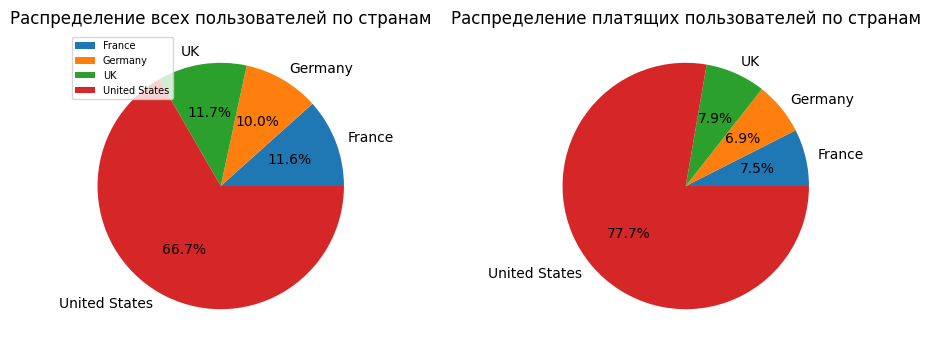

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 4))

users_country_ratio.plot(y='users_count', kind='pie', autopct='%1.1f%%', ax=ax1)
ax1.set_title('Распределение всех пользователей по странам')
ax1.legend(loc='upper left', fontsize=7) 
ax1.set_ylabel('')

users_country_ratio.plot(y='payer_count', kind='pie', autopct='%1.1f%%', ax=ax2, legend=False)
ax2.set_title('Распределение платящих пользователей по странам')
ax2.set_ylabel('');

Больше всего пользователей из США — 66,7%. Из Великобритании, Франции и Германии примерно одинаковое количество. 

Платящих пользователей также больше всего в США — 6,9%. 

Больше всего платящих пользователей из США — 77,7%, Великобритании — 7,9%, Франции — 7,5%, Германии — 6,9%.

### 3.2.2. Устройства пользователей 

Посмотрим, какие устройства и в каких странах используют чаще всего, а также какие устройства предпочитают те, кто совершал покупки в приложении.

In [26]:
users_device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'})
users_device['percent'] =  (users_device['payer'] / users_device['user_id'] * 100).round(2)
users_device.columns = ['users_count', 'payer_count', 'percent_payer']

users_device.sort_values(by='percent_payer', ascending=False)

users_count  payer_count  percent_payer
device                                          
Mac            30042         1912           6.36
iPhone         54479         3382           6.21
Android        35032         2050           5.85
PC             30455         1537           5.05

Рассмотрим на графиках доли типов устройств среди всех пользователей, а также доли устройств среди платящих пользователей.

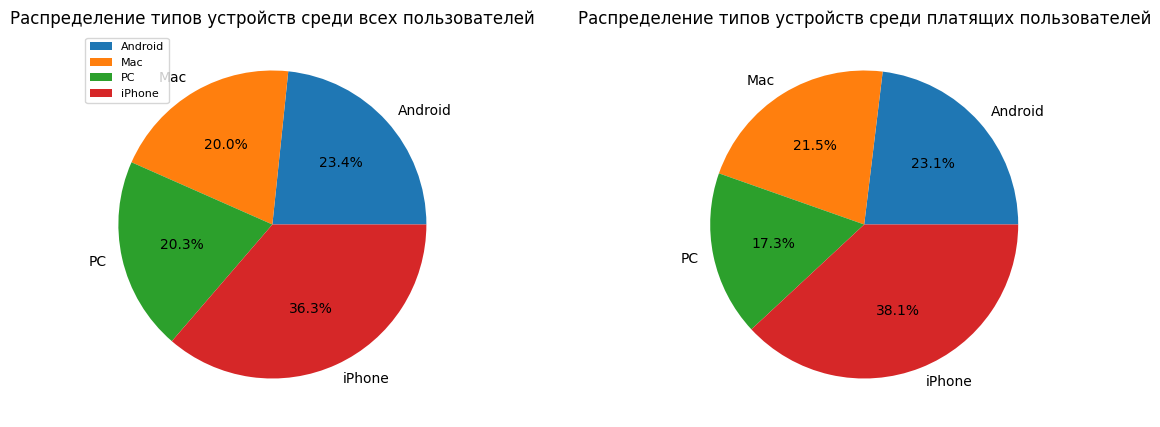

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

users_device.plot(y='users_count', kind='pie', autopct='%1.1f%%', ax=ax1)
ax1.set_title('Распределение типов устройств среди всех пользователей') 
ax1.legend(loc='upper left', fontsize=8)
ax1.set_ylabel('')

users_device.plot(y='payer_count', kind='pie', autopct='%1.1f%%', ax=ax2, legend=False)
ax2.set_title('Распределение типов устройств среди платящих пользователей')
ax2.set_ylabel('');

Рассмотрим, как распределены типы устройств пользователей по странам. Это поможет нам понять, какие устройства наиболее популярны в разных регионах и есть ли существенные различия между ними.

In [28]:
users_device_region = profiles.groupby(['region', 'device'])['user_id'].count()
users_device_region = users_device_region.unstack().fillna(0)
users_device_region = users_device_region.div(users_device_region.sum(axis=1), axis=0).mul(100).astype(int)

users_device_region

device         Android  Mac  PC  iPhone
region                                 
France              30   10  39      19
Germany             29   10  39      20
UK                  29   10  40      20
United States       20   24  10      44

Можно сделать вывод, что самыми популярными устройствами среди пользователей являются iPhone и Android. У платящих пользователей распределение по типам устройств похожее. 

Однако в разных странах ситуация различается: в США наиболее популярен iPhone, в то время как в других странах лидируют ПК и Android.

## 3.3. Изучение рекламных каналов

Рассмотрим рекламные каналы и узнаем, какие привлекли больше всего платящих пользователей.

In [29]:
channel_ad = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='user_id', ascending=False)
channel_ad['percent'] =  (channel_ad['payer'] / channel_ad['user_id'] * 100).round(2)
channel_ad.columns = ['users_count', 'payer_count', 'percent_payer']

channel_ad.sort_values(by='percent_payer', ascending=False)

users_count  payer_count  percent_payer
channel                                                    
FaceBoom                  29144         3557          12.20
AdNonSense                 3880          440          11.34
lambdaMediaAds             2149          225          10.47
TipTop                    19561         1878           9.60
RocketSuperAds             4448          352           7.91
WahooNetBanner             8553          453           5.30
YRabbit                    4312          165           3.83
MediaTornado               4364          156           3.57
LeapBob                    8553          262           3.06
OppleCreativeMedia         8605          233           2.71
organic                   56439         1160           2.06

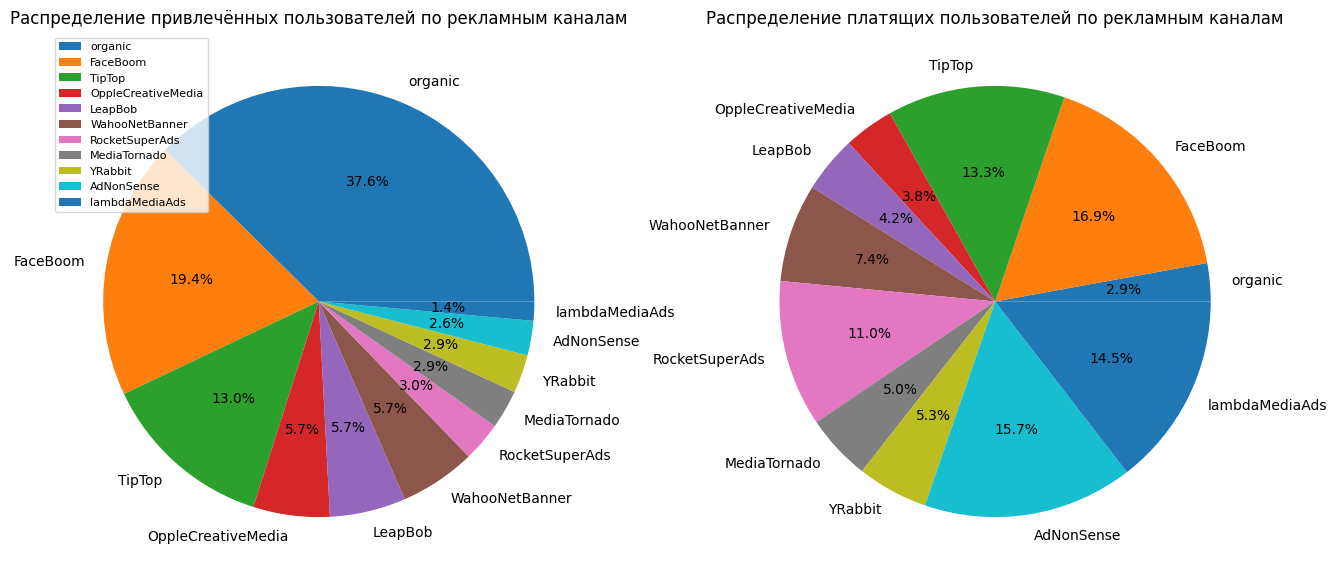

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 7))

channel_ad.plot(y='users_count', kind='pie', autopct='%1.1f%%', ax=ax1)
ax1.set_title('Распределение привлечённых пользователей по рекламным каналам') 
ax1.set_ylabel('')
ax1.legend(loc='upper left', fontsize=8)

channel_ad.plot(y='percent_payer', kind='pie', autopct='%1.1f%%', ax=ax2, legend=False)
ax2.set_title('Распределение платящих пользователей по рекламным каналам')
ax2.set_ylabel('');

Изучили, сколько пользователей конвертируются в покупателей в зависимости от региона, устройства и канала привлечения. Это позволило нам определить основной рынок.
    
Оказалось, что больше всего пользователей приходит из США, и именно они лучше всего конвертируются. При этом большая часть пользователей пользуется мобильными устройствами. Также мы выяснили, что пользователи Apple имеют лучшую конверсию в покупателей.

Из всех источников привлечения лучше всего себя показал FaceBoom — с его помощью было привлечено около 29 тысяч пользователей. Кроме того, здесь самая высокая конверсия в покупателей — около 12%.

## 3.4. Исследование маркетинга

### 3.4.1. Общие расходы на маркетинг

Для начала определим общую сумму расходов на маркетинг за период с 1 мая по 27 октября.

In [31]:
print('Общая сумма затрат на маркетинг составляет', costs.costs.sum().round(2))

Общая сумма затрат на маркетинг составляет 105497.3


### 3.4.2. Расходы на рекламные каналы

Рассмотрим, как распределяются затраты на различные рекламные каналы для привлечения пользователей.

In [32]:
costs_fraction = costs.groupby('channel').agg({'costs': 'sum'})
costs_fraction['percentage'] = ((costs_fraction['costs'] / 105497.3) * 100).round(2)
costs_fraction.sort_values(by='percentage', ascending=False)

costs  percentage
channel                                 
TipTop              54751.30       51.90
FaceBoom            32445.60       30.75
WahooNetBanner       5151.00        4.88
AdNonSense           3911.25        3.71
OppleCreativeMedia   2151.25        2.04
RocketSuperAds       1833.00        1.74
LeapBob              1797.60        1.70
lambdaMediaAds       1557.60        1.48
MediaTornado          954.48        0.90
YRabbit               944.22        0.90

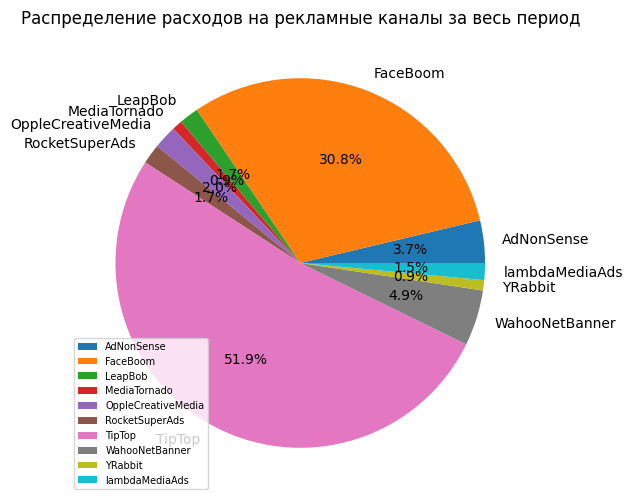

In [33]:
costs_fraction.plot(y='percentage', kind='pie', autopct='%1.1f%%', figsize=(8,6))

plt.title('Распределение расходов на рекламные каналы за весь период');
plt.legend(loc='lower left', fontsize=7)
plt.ylabel('');

Из данных следует, что больше всего средств, примерно 82%, было израсходовано на два рекламных канала — TipTop и FaceBoom, и 18% — на остальные 8 источников.

### 3.4.3. Распределение расходов по временным периодам

Построим несколько графиков по месяцам, неделям и дням, которые наглядно покажут, как распределялись расходы на рекламную компанию по каждому из каналов.

Сначала рассмотрим, как распределяются общие расходы по каналам каждый месяц.

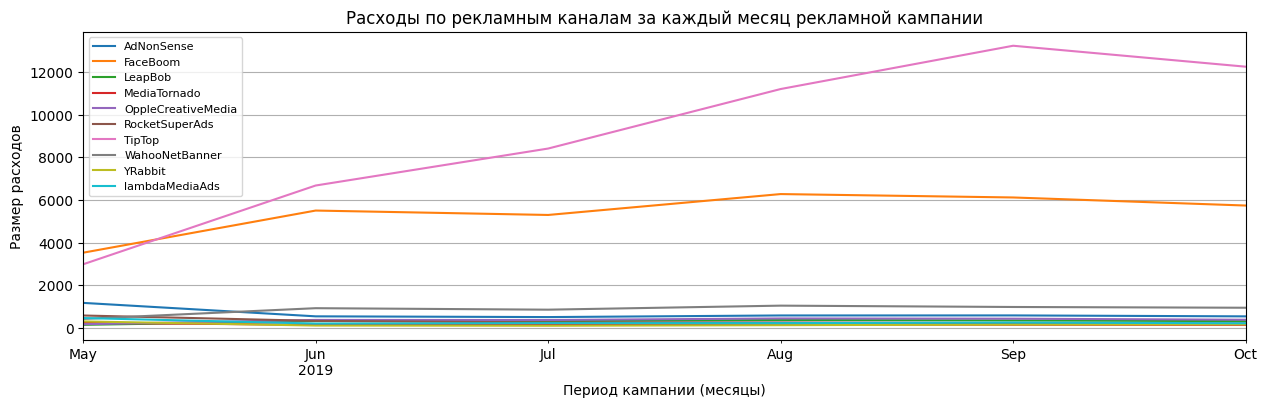

In [34]:
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(
    figsize=(15, 4),
    grid=True
)

plt.legend(loc='upper left', fontsize=8)
plt.title('Расходы по рекламным каналам за каждый месяц рекламной кампании') 
plt.xlabel('Период кампании (месяцы)')
plt.ylabel('Размер расходов');

Выделяются два уже знакомых нам рекламных канала: FaceBoom и TipTop, с самого начала рекламной кампании расходы только увеличивались.

В начале кампании расходы на FaceBoom и TipTop составляли около 3500 условных единиц в месяц. К концу кампании эти затраты выросли до 12 и 6 тысяч условных единиц соответственно. Затраты на другие каналы практически не изменились и оставались на уровне до 1000 условных единиц в месяц.

Рассмотрим, как распределяются расходы по каналам на рекламную кампанию в каждую неделю.

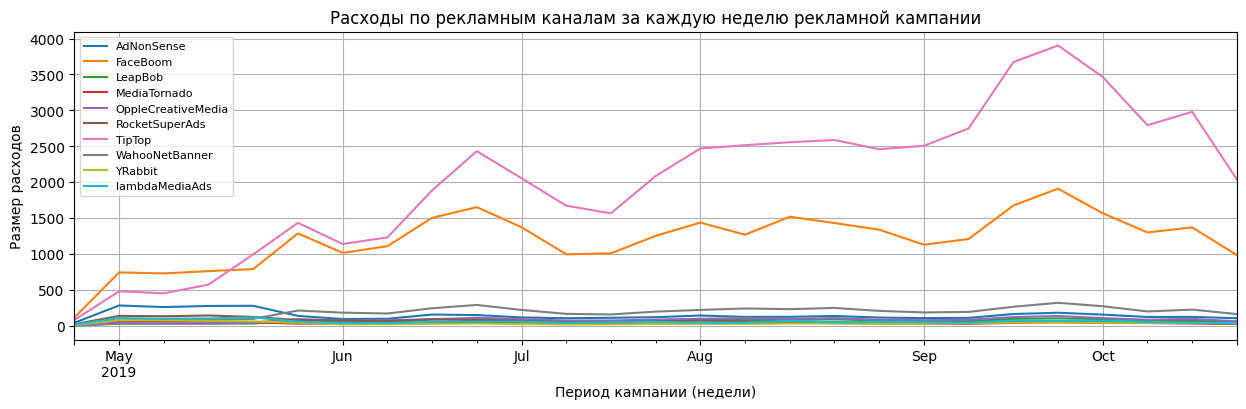

In [35]:
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(
    figsize=(15, 4),
    grid=True
)

plt.legend(loc='upper left', fontsize=8)
plt.title('Расходы по рекламным каналам за каждую неделю рекламной кампании') 
plt.xlabel('Период кампании (недели)')
plt.ylabel('Размер расходов');

Расходы по каналу FaceBoom были пиковыми в середине июня и конце сентября, а в остальное время они составляли примерно 1000–1500 условных единиц в неделю.

Расходы по каналу TipTop увеличивались постоянно, за исключением конца июля. В сентябре они достигли максимального значения в 4000 условных единиц.

Рассмотрим также расходы за каждый день.

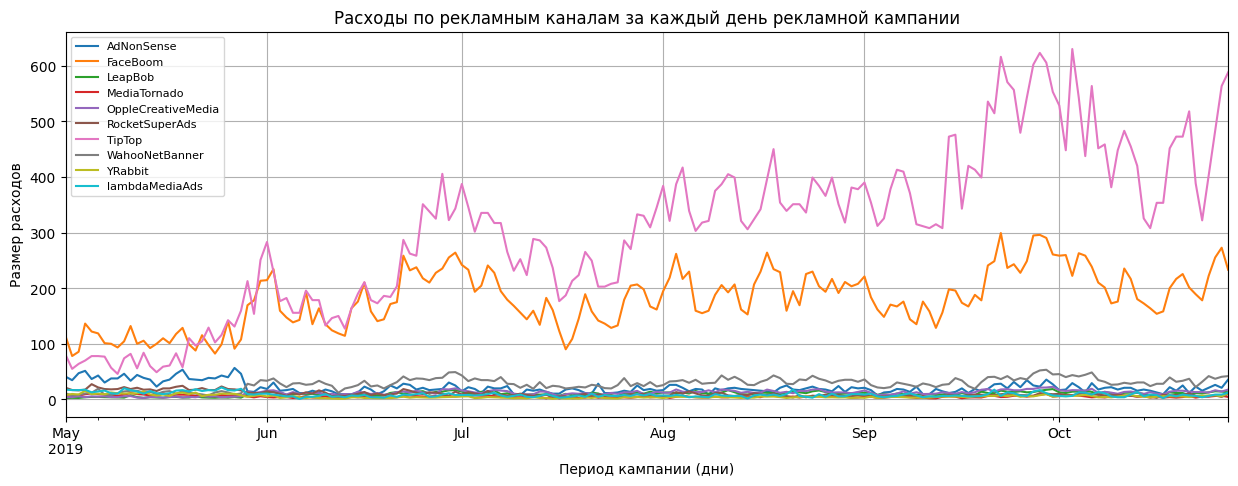

In [36]:
costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum').plot(
    figsize=(15, 5),
    grid=True
)

plt.legend(loc='upper left', fontsize=8)
plt.title('Расходы по рекламным каналам за каждый день рекламной кампании') 
plt.xlabel('Период кампании (дни)')
plt.ylabel('Размер расходов');

У FaceBoom и TipTop были периоды, когда расходы снижались, а затем следовал очередной бурный рост. Интересно, с чем это было связано и в каком формате происходила оплата за привлечение пользователей. Ежедневные расходы составляют от 0 до 600 условных единиц.

### 3.4.4. Средняя стоимость привлечения пользователя

Изучим, сколько в среднем стоило привлечение одного пользователя по каждому каналу привлечения.

In [37]:
cac = (profiles
       .groupby('channel')
       .agg({'acquisition_cost': 'mean'})
       .sort_values(by='acquisition_cost', ascending=False)
       .round(3)
      ).rename(columns={'acquisition_cost': 'cac'})

cac

cac
channel                  
TipTop              2.799
FaceBoom            1.113
AdNonSense          1.008
lambdaMediaAds      0.725
WahooNetBanner      0.602
RocketSuperAds      0.412
OppleCreativeMedia  0.250
YRabbit             0.219
MediaTornado        0.219
LeapBob             0.210
organic             0.000

Посчитаем средний общий CAC.

In [38]:
cac_total = (profiles.agg({'acquisition_cost': 'mean'}))
round(cac_total, 2)

acquisition_cost    0.7
dtype: float64

Самый дорогой канал привлечения одного пользователя — TipTop, затем идут FaceBoom и AdNonSense.

Пока что FaceBoom кажется наиболее эффективным, хоть и вторым по затратам. Возможно, эти расходы окупаются.

Самым дорогим каналом привлечения пользователей является TipTop. Однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить тем, что аудитория канала молодая, и, следовательно, их платёжеспособность не очень высока.

### 3.4.5. Оценка окупаемости рекламы (LTV, ROI, CAC)

Оценка окупаемости поможет нам понять, какие каналы, страны или устройства приносят наибольшую прибыль относительно вложенных средств. Чтобы оценить окупаемость рекламы, нам понадобятся примененные нами функции.

Прежде всего, исключим из исследования «органических» пользователей, поскольку они не относятся ни к одному рекламному каналу и могут сильно исказить результаты анализа.

In [39]:
profiles = profiles.query('channel != "organic"')

Представим что сейчас 1 ноября 2019 года. Зададим горизонт и момент анализа.

In [40]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Рассчитаем LTV и ROI, и построим графики.

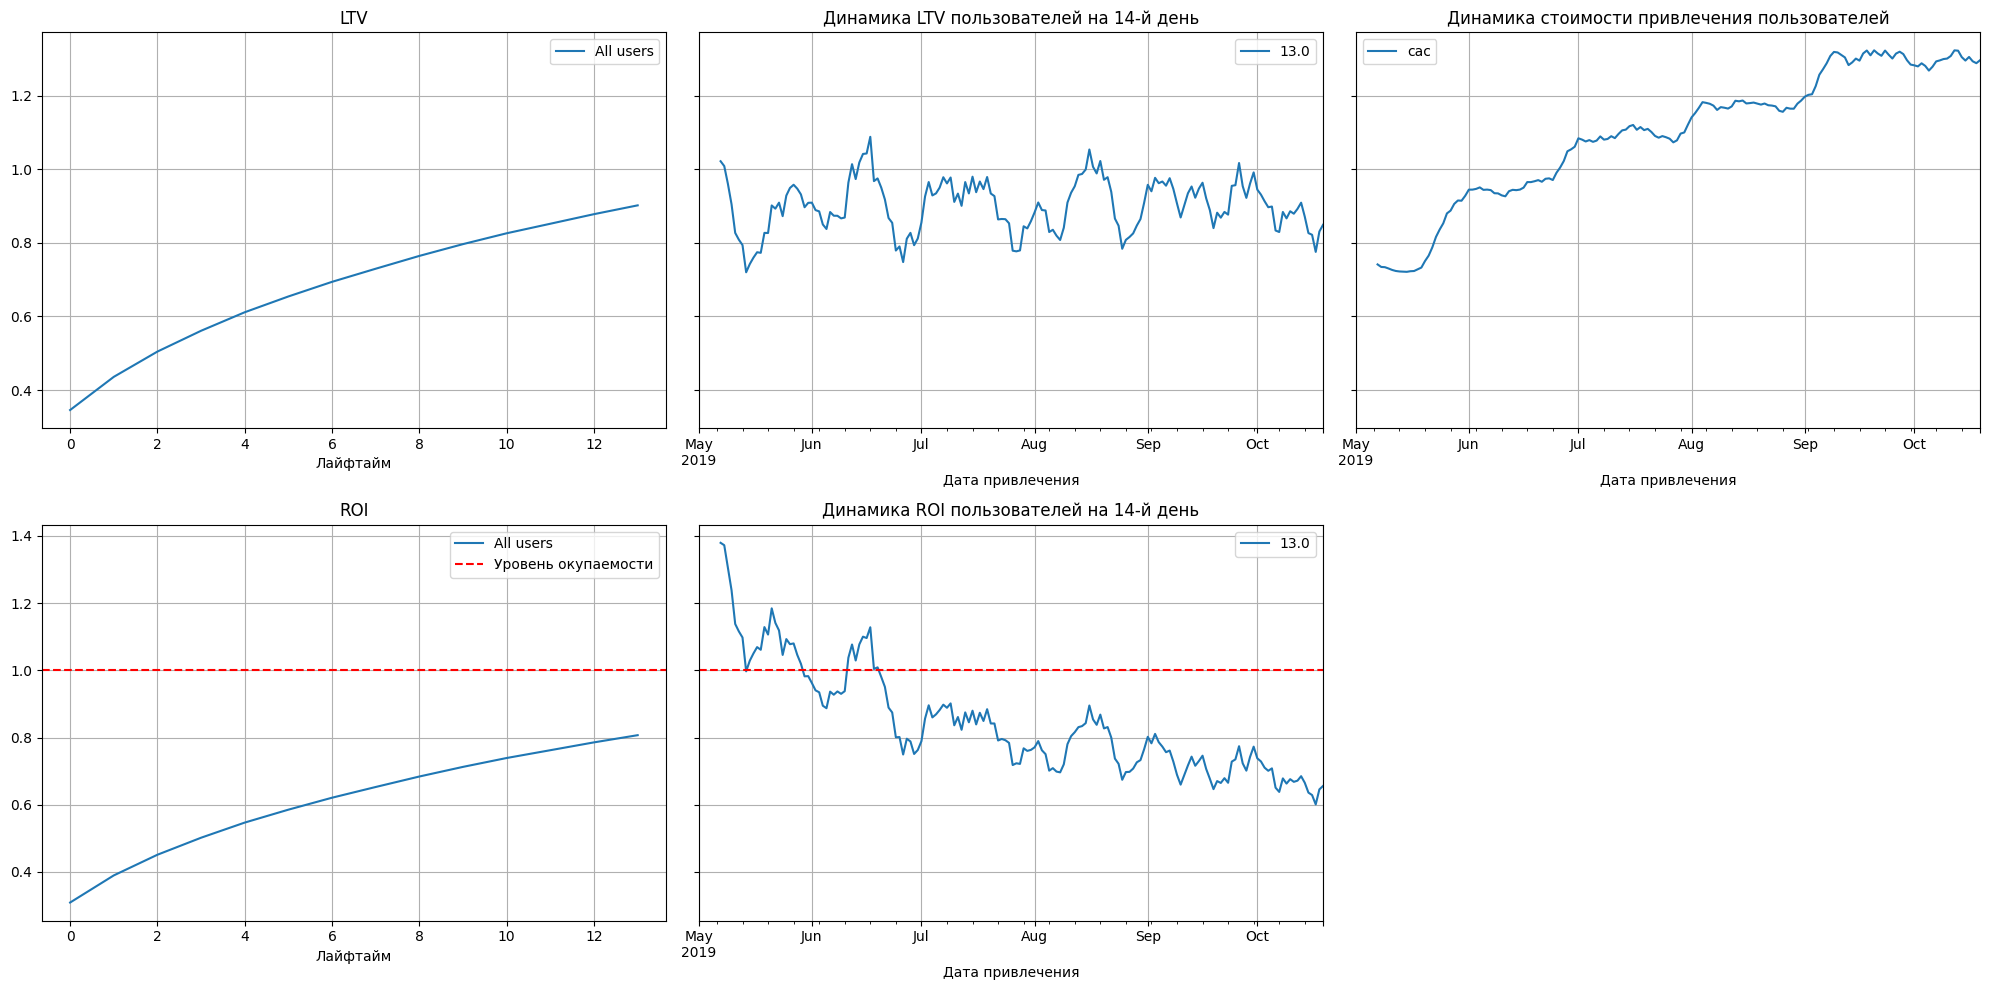

In [41]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Наблюдаем, что динамика ROI падает. При этом стоимость привлечения клиента (САС) с мая по конец октября увеличивается, а доход от одного клиента (LTV) остаётся относительно стабильной. 

Это означает, что затраты на привлечение новых клиентов стали выше, чем прибыль, которую они приносят. Такая ситуация может быть вызвана различными факторами, например, усилением конкуренции на рынке или изменением предпочтений целевой аудитории.

#### 3.4.5.1. Окупаемость рекламы по странам

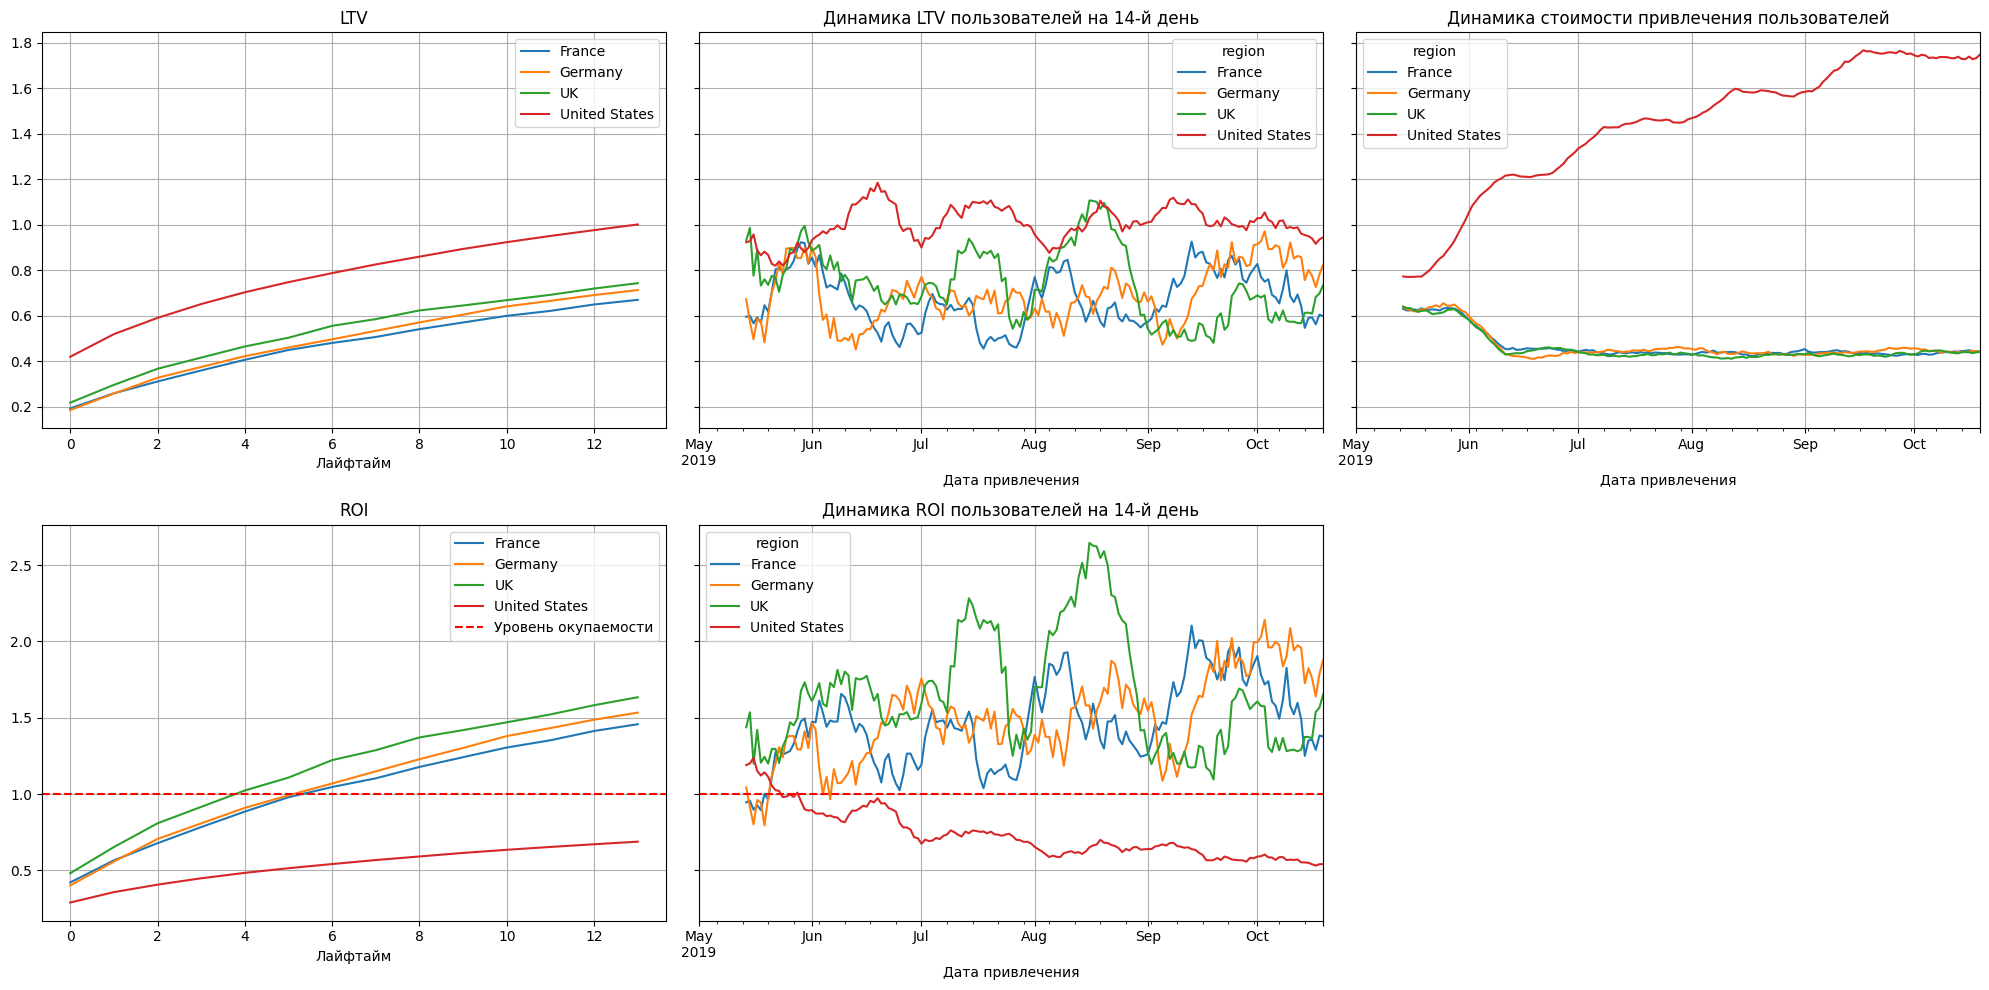

In [42]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На графиках выделяются пользователи из США. У них высокая прибыль (LVT), но при этом высокие затраты (CAC). Коэффициент рентабельности (ROI) у них ниже, чем у других. Это означает, что в целом они приносят больше прибыли, но не окупаются со временем.

Поскольку США — наш основной рынок, стоит более детально изучить конверсию и удержание в этой стране.

#### 3.4.5.2. Окупаемость рекламы по устройствам

Рассмотрим окупаемость рекламой кампании в зависимости от типа устройства.

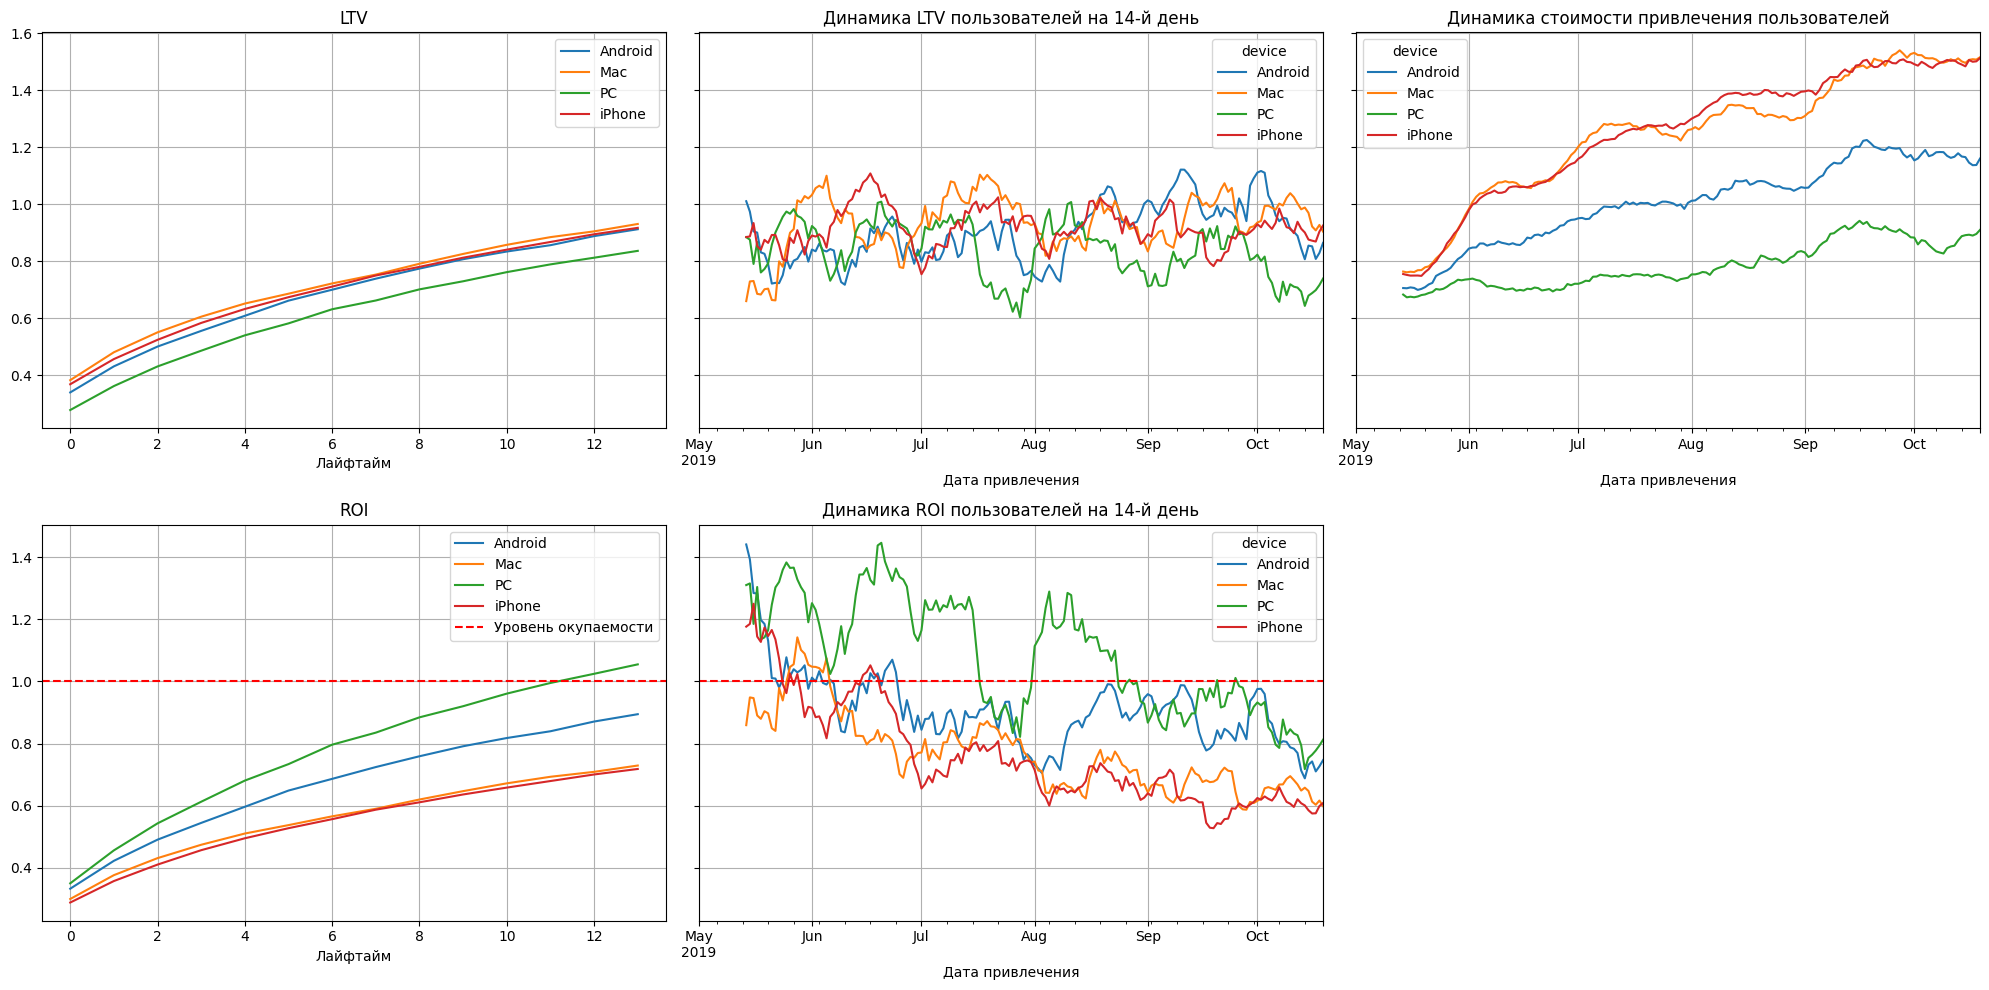

In [43]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Прибыль от пользователя (LTV) плавно растёт одинаково для всех устройств. Динамика стоимости привлечения пользователей с iPhone и Mac существенно возрастает, в то время как у пользователей с PC этот показатель остаётся наиболее низким.

Окупаемость инвестиций (ROI) является невысокой для всех устройств, кроме PC. Окупаемость на 14 день была хорошей до июня, затем начала снижаться. Пользователи с PC показывают себя с лучшей стороны.

#### 3.4.5.3. Окупаемость рекламы по рекламным каналам

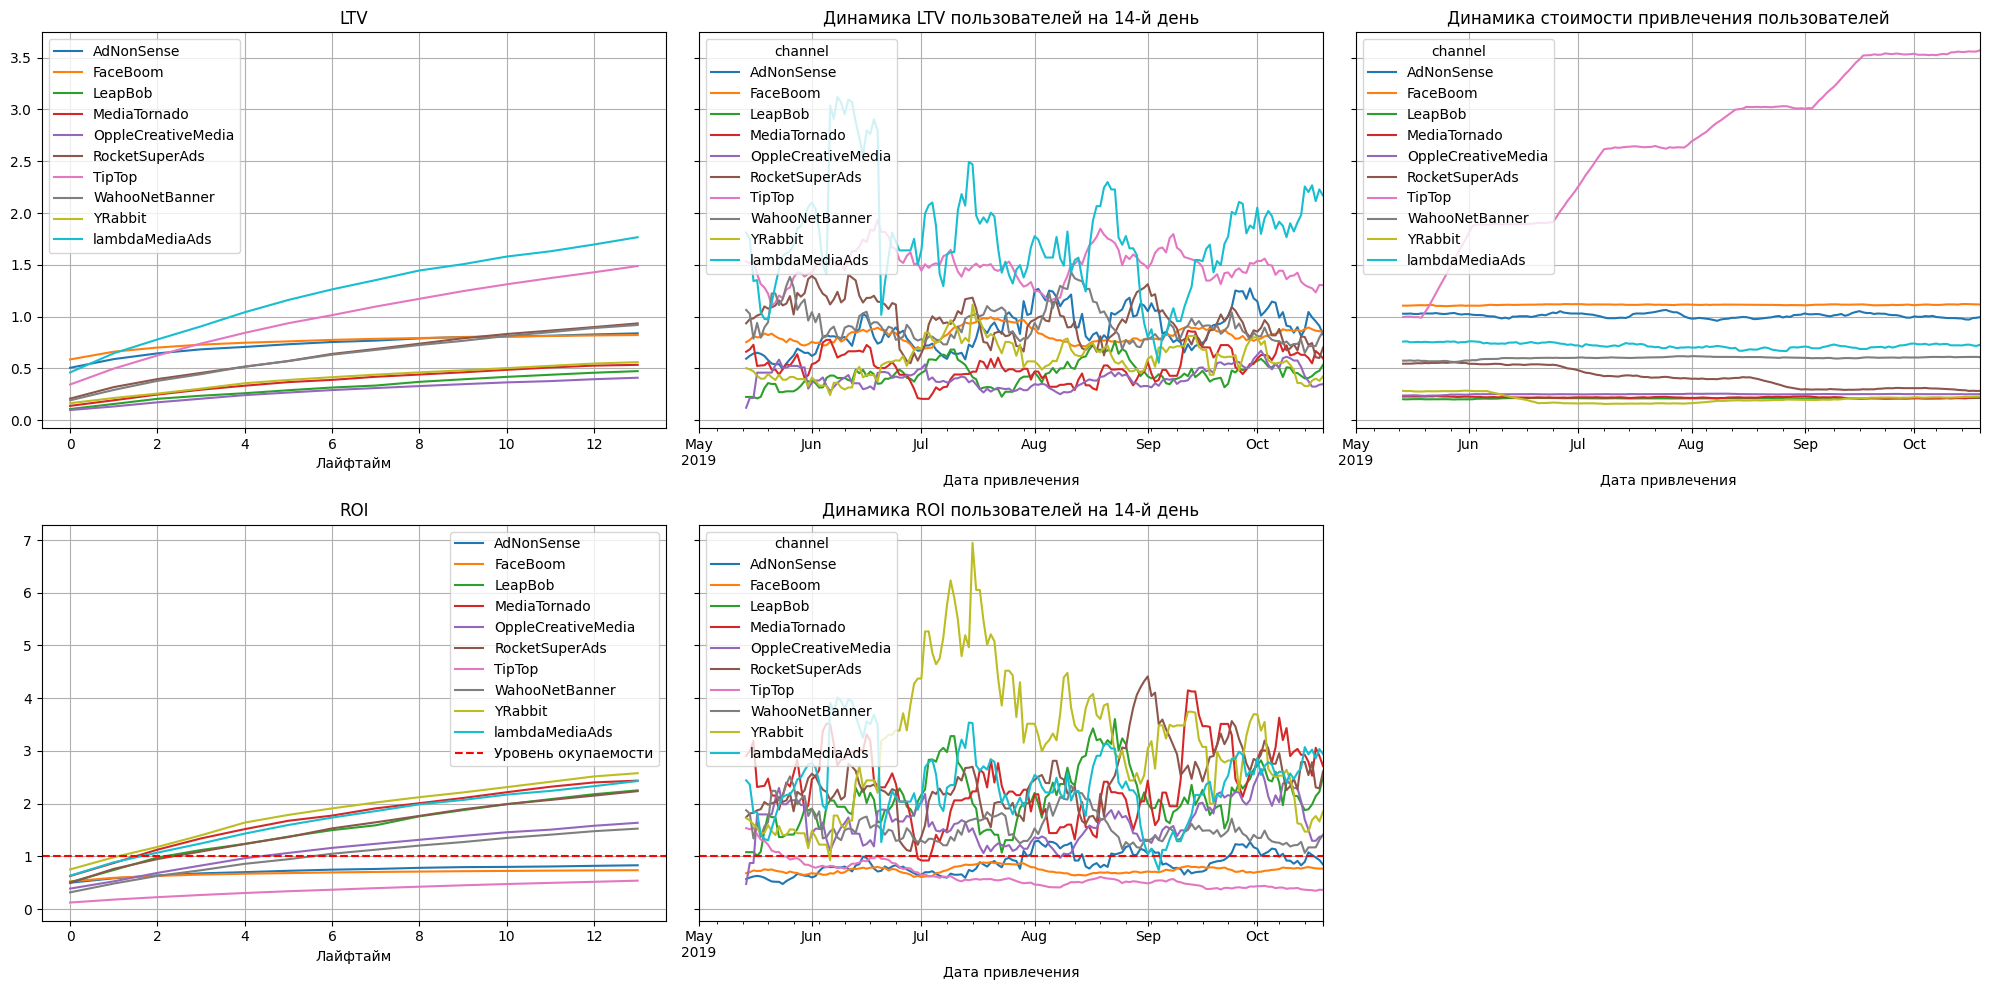

In [44]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Наибольший интерес вызывают графики затрат и окупаемости. 

Расходы на TipTop оказались самыми высокими, из-за чего этот канал привлечения клиентов принёс наименьшую прибыль. 

В то же время YRabbit и MediaTornado продемонстрировали наилучшие результаты по прибыльности.

### 3.4.6. Анализ конверсии (CR)

#### 3.4.6.1. Конверсия пользователей

Рассмотрим изменение динамики конверсии пользователей.

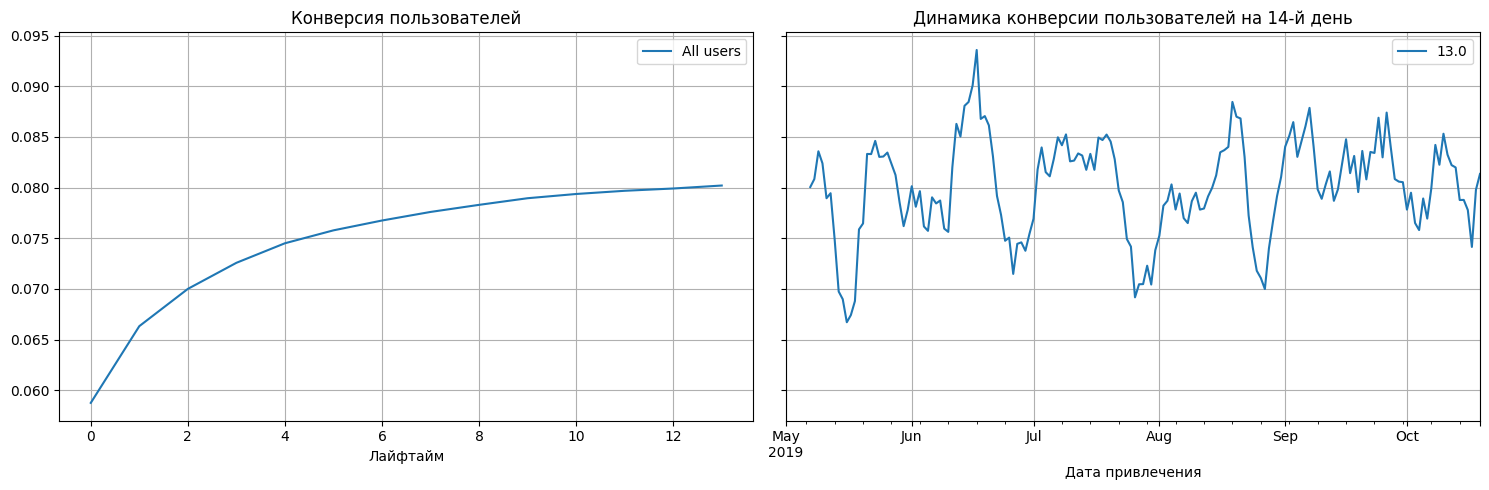

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Наблюдаем низкий уровень конверсии. Пользователи не торопятся совершать покупки. В первые четыре дня наблюдается наибольший рост показателей, но затем они значительно снижаются.

#### 3.4.6.2. Конверсия по странам

Рассмотрим конверсию по странам.

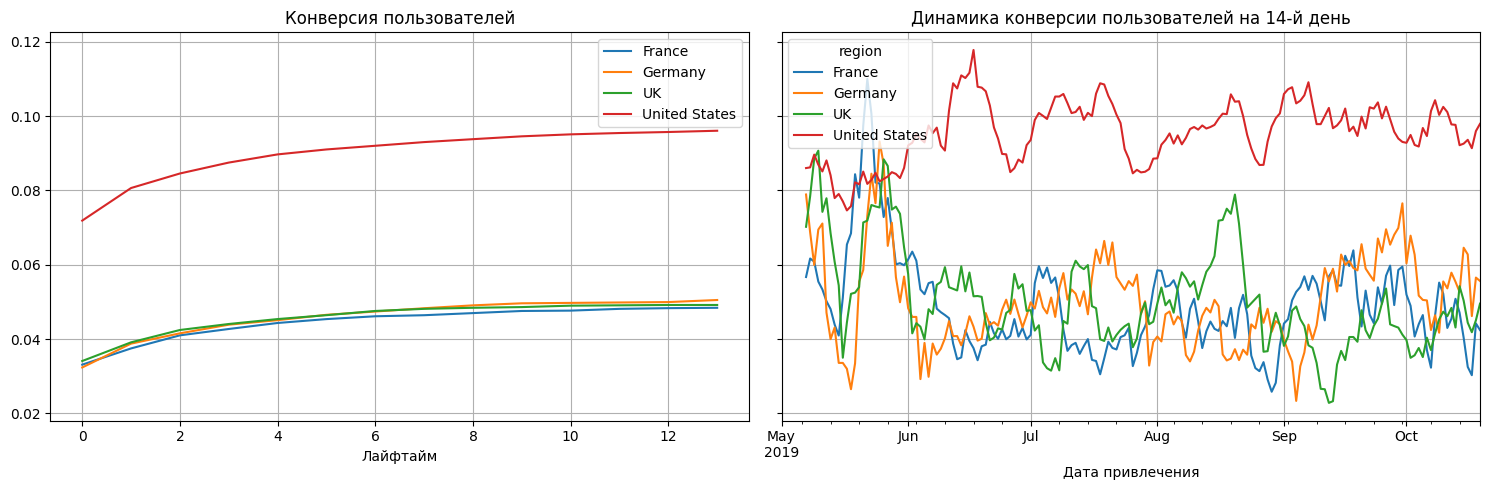

In [46]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Графики наглядно демонстрируют существенное различие уровня конверсии пользователей из США с другими странами. 

По показателям на 14-й день, в США наблюдается ситуация: в мае и июне зафиксирован самый низкий уровень, после чего показатели начали расти. В то же время в других странах, напротив, в мае и июне произошёл резкий скачок, а затем уровень стабилизировался. 

#### 3.4.6.3. Конверсия по устройствам

Исследуем конверсию по устройствам.

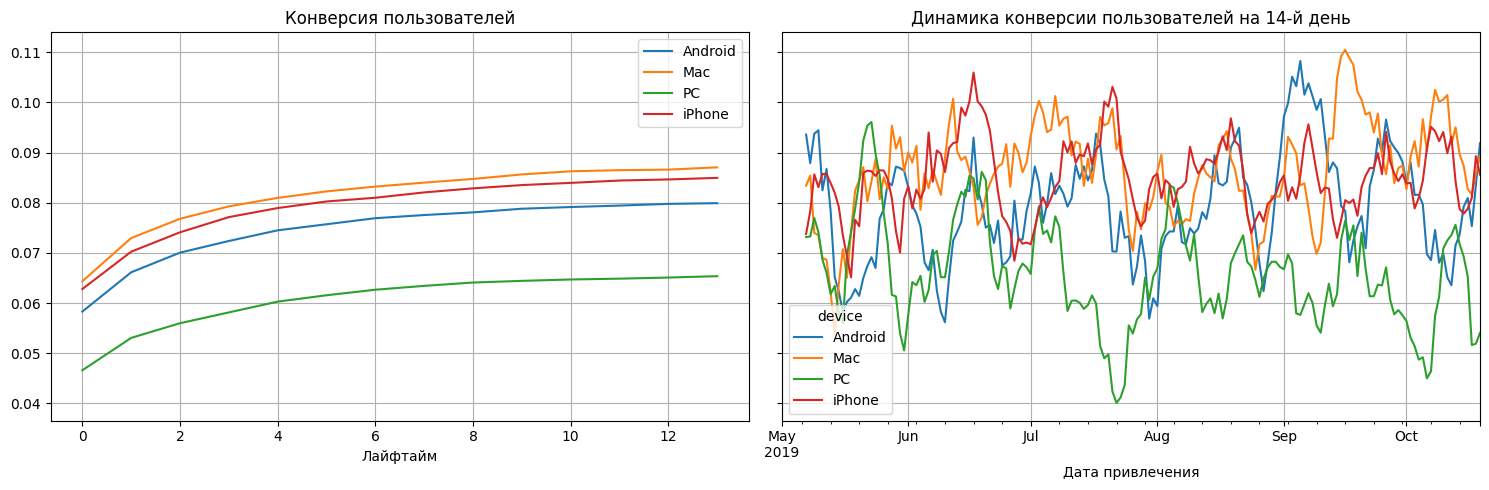

In [47]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наибольший процент конверсии наблюдается среди пользователей iPhone и Mac, чуть меньший — среди владельцев Android-устройств, а самый низкий показатель конверсии — у пользователей PC.

#### 3.4.6.4. Конверсия по рекламным каналам

Исследуем конверсию по каналам.

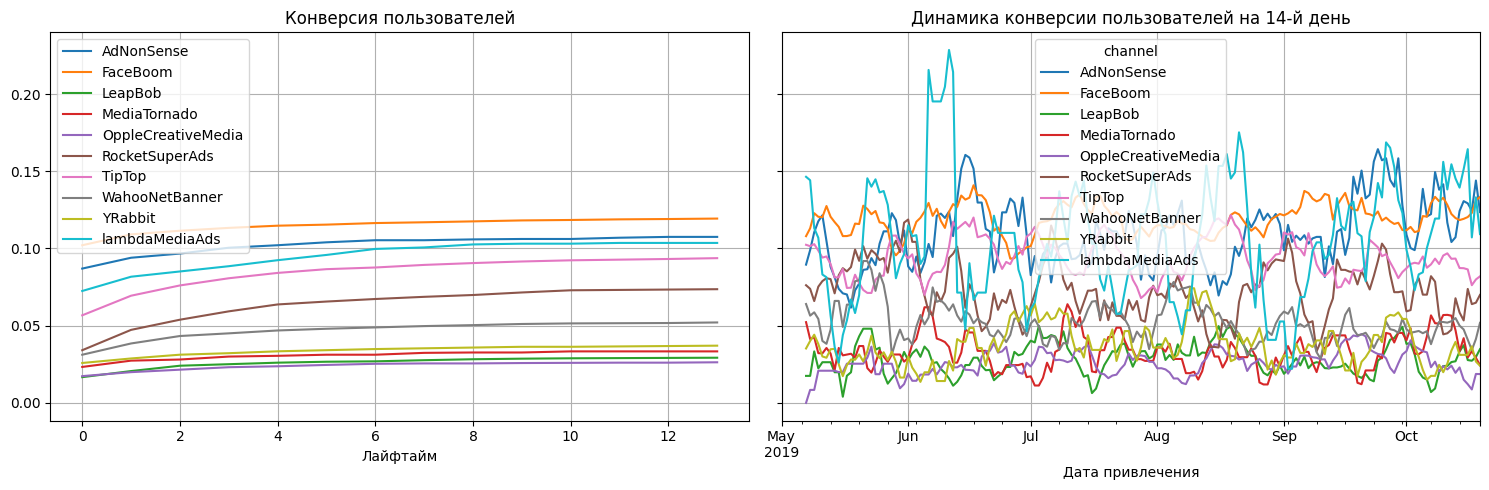

In [48]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Ситуация неоднозначная. Лучше всего конвертируются пользователи каналов FaceBoom, AdNonSense и RocketSuperAds. Также хорошо показывает себя канал lambdaMediaAds.

На втором графике заметно, что канал lambdaMediaAds нестабилен: в июне был сильный скачок, а в сентябре — сильная просадка. Другие каналы более стабильны.

### 3.4.7. Анализ удержания (CRR)

Анализ удержания поможет нам определить, какие каналы, страны или устройства способствуют сохранению клиентской базы и повышению лояльности пользователей.

#### 3.4.7.1. Удержание пользователей

Изучим показатель удержания пользователей.

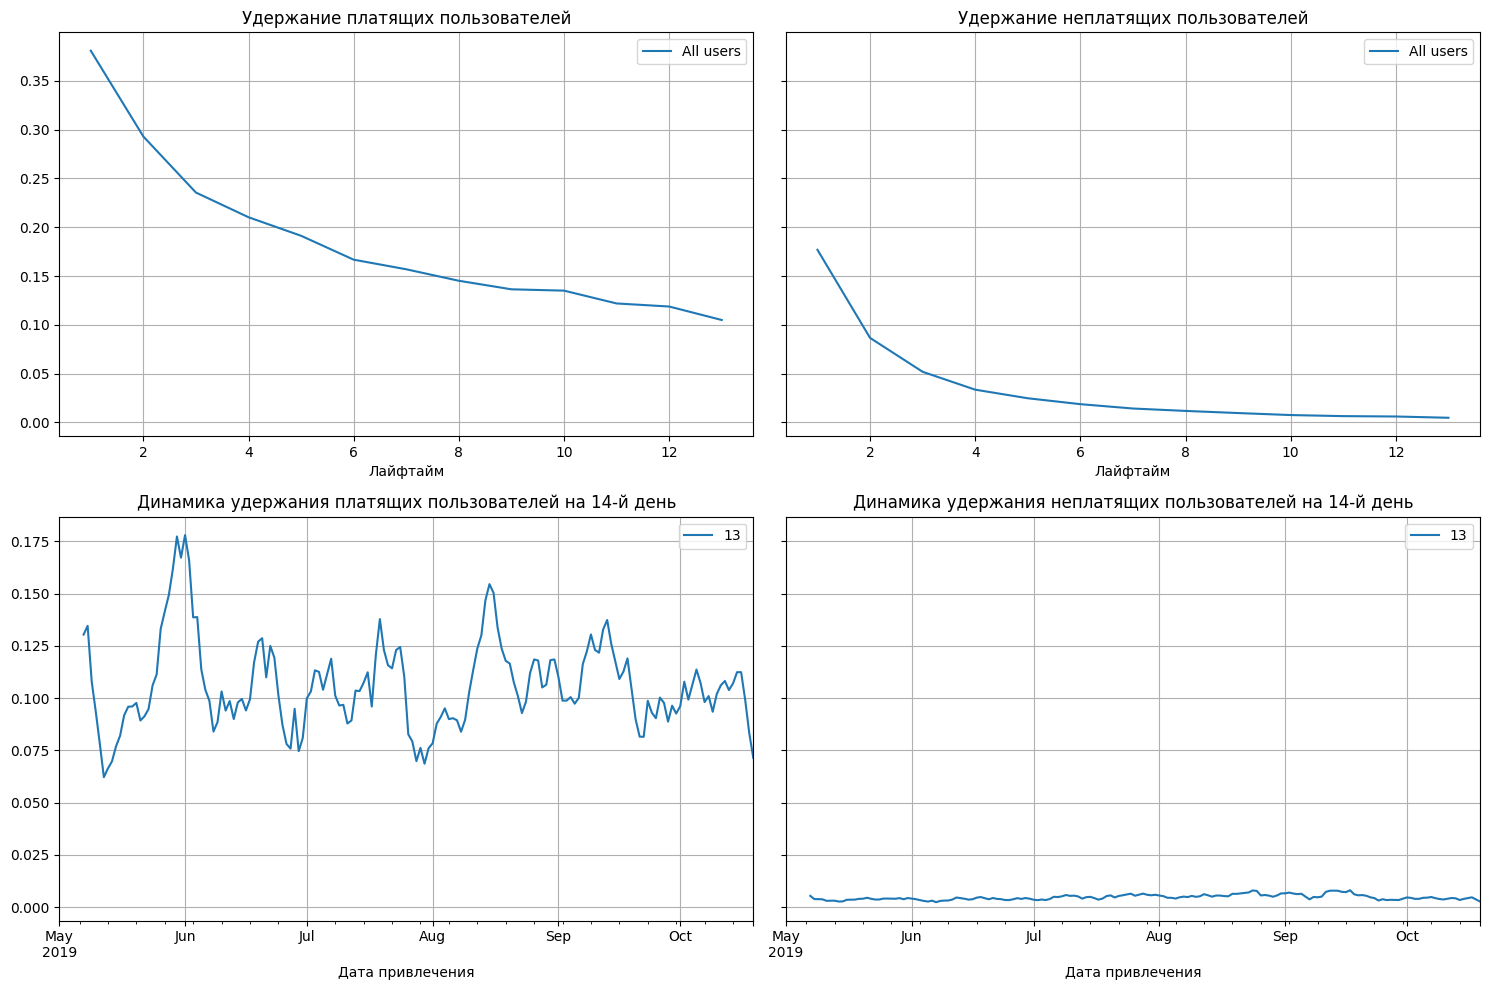

In [49]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

Графики удержания показывают, что пользователи, которые платят, остаются гораздо дольше, чем те, кто не платит. Это вполне ожидаемо. Однако даже на 14-й день их число составляет в среднем от 6 до 12 процентов от общего числа пользователей.

#### 3.4.7.2. Удержание по странам

Исследуем удержание пользователей по странам.

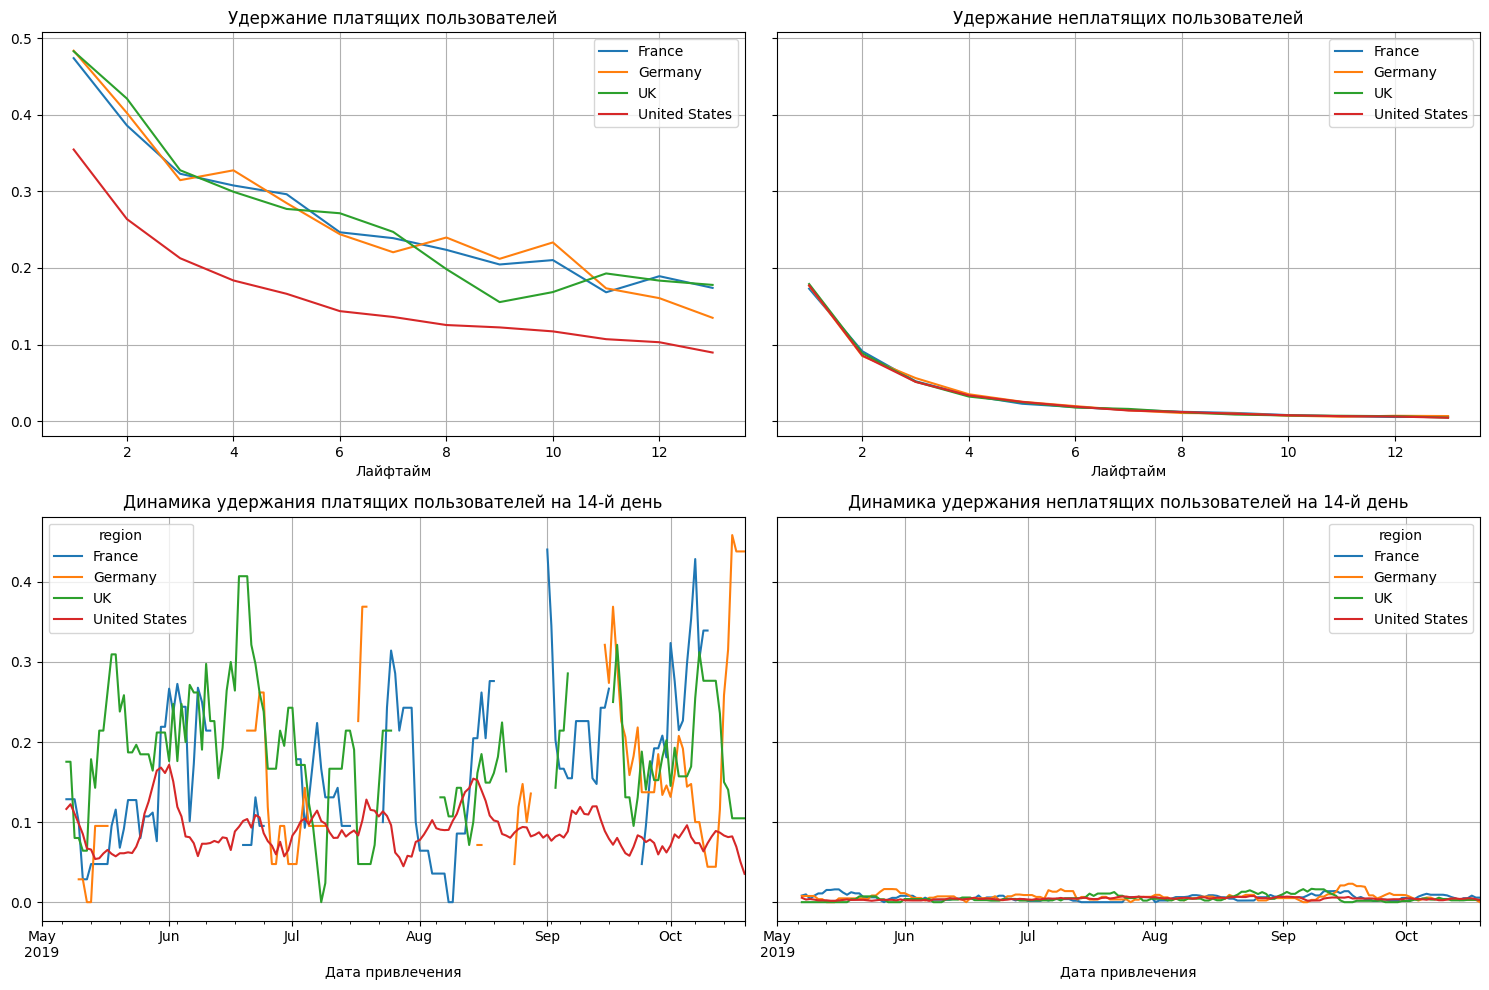

In [50]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

Наблюдаем различия в показателях между странами. Например, пользователи из США демонстрируют худшие результаты по сравнению с другими странами. Пользователи из Германии также показывают странные результаты.

#### 3.4.7.3. Удержание по устройствам

Исследуем удержание пользователей по устройствам.

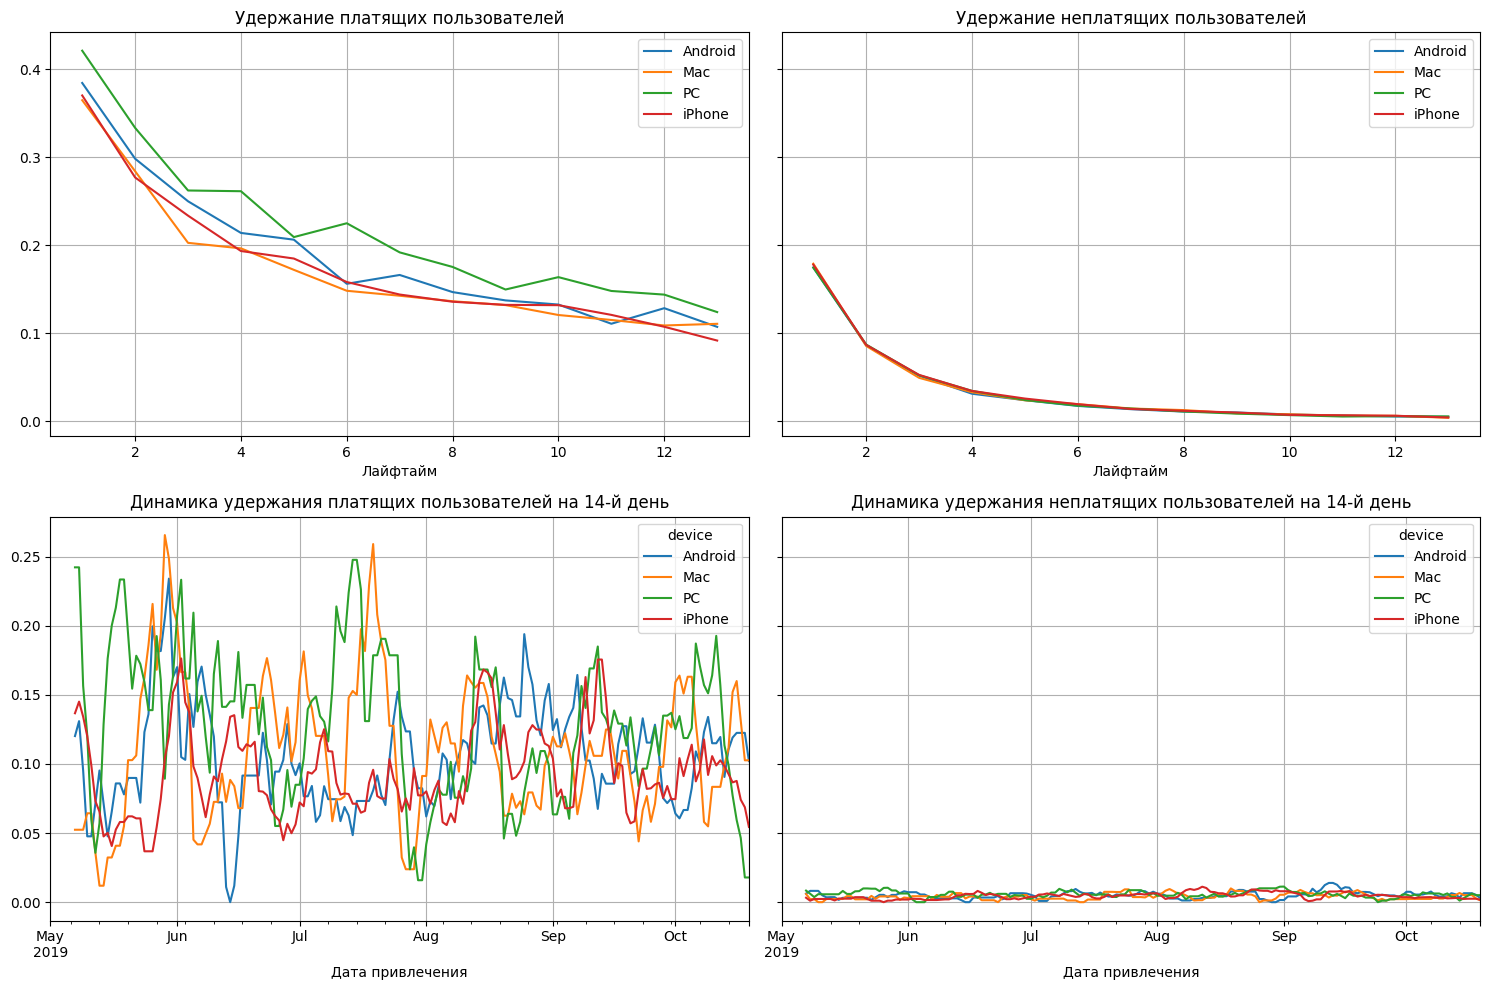

In [51]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

Наблюдаем схожую картину по всем типам устройств. Однако у пользователей с PC показатель удержания немного лучше, хотя он и остаётся крайне нестабильным по показателям 14-го дня.

#### 3.4.7.4. Удержание по рекламным каналам

Исследуем показатели удержания по рекламным каналам.

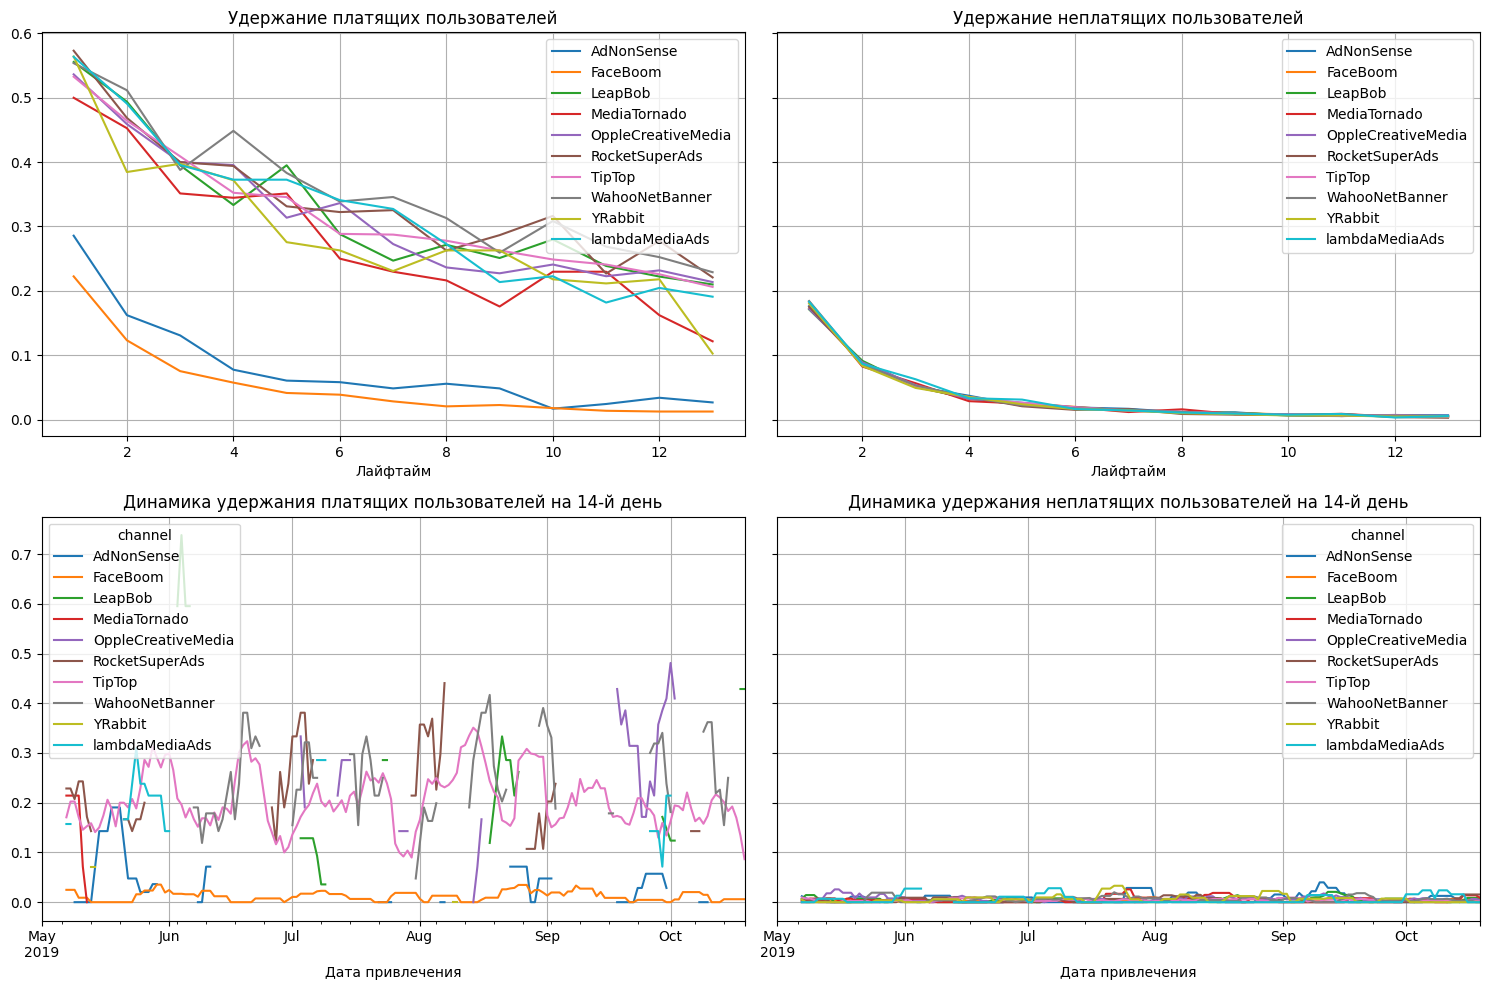

In [52]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Здесь можно увидеть явных аутсайдеров: у FaceBoom и AdNonSense показатели удержания очень низкие. Это очень важный показатель. Кроме того, у FaceBoom также наблюдается низкий показатель удержания на 14-й день. Наилучшие результаты демонстрируют пользователи TipTop.

# 4. Заключение и рекомендации <a id="conclusion"></a>

### Общие результаты исследования

В ходе исследовательского анализа данных были изучены различные аспекты маркетинговой стратегии компании, включая анализ пользователей, стран, устройств и каналов привлечения в рамках проведения рекламной кампании. 

Были выявлены следующие причины убытков:
1. Увеличение расходов на рекламу, которая не оправдала ожиданий;
2. Неправильный выбор и акцент на рекламные каналы привлечения пользователей;
3. Основной упор на рынок США, в то время как другие регионы могли бы принести больше выгоды;
4. Не совсем правильно расставлены приоритеты по устройствам пользователей. Более качественные результаты показывают пользователи ПК, а не мобильных устройств.

Эти факторы привели к убыткам компании за последние месяцы. Рекомендации, которые будут предложены, помогут изменить ситуацию и сделать кампанию прибыльной.


#### Анализ пользователей

При изучении исходных данных о пользователях мы узнали, что большинство пользователей из США (66%), Великобритании (11.7%), Франции (11.6%), Германии (10%). Чаще всего они пользуются мобильными устройствами — iPhone (36.3%), Android (23.5%). Реже компьютерами Mac (20%) и PC (20.3%).

Платящих пользователей больше всего в США (77%), Великобритании (7.9%), Франции (7.5%), Германии (6.9%). Чаще всего пользуются iPhone (38.1%), Android (23.1%), Mac (21.5%) и PC (17.3%).
 

#### Каналы привлечения и результаты рекламной кампании

За всё время на рекламную кампанию было израсходовано 105 497 условных единиц.

Больше всего органических пользователей (36.3%). 
По каналам распределение привлеченных пользователей и доля платящих следующее:
- FaceBoom (19.4%), платящих (12.2%);
- TipTop (13%), платящих (9.6%);
- AdNonSense (2.6%), платящих (11.34%);
- lambdaMediaAds (1.4%), платящих (10.4%).

При этом 80% расходов идут всего на два канала — TipTop и FaceBoom. Расходы на них с каждым месяцем сильно увеличивались.

Расходы на рекламную кампанию за всё время:
- TipTip (51.90%);
- FaceBoom (30.75%);
- WahooNetBanner (4.88%).

Средняя стоимость привлечения составляет 0.7 за пользователя. По рекламным каналам средняя стоимость следующая:
- TipTop (2.799);
- FaceBoom (1.113);
- AdNonSense (1.008).

#### Окупаемость рекламы

Стоимость привлечения пользователей значительно растет, и затраченные средства на данный момент не окупаются. В начале рекламной кампании до июня показатели держались в норме, после чего полетели вниз, а расходы, наоборот, полетели вверх.

По странам: хуже всего себя показывает США. Стоимость привлечения пользователей огромная, прибыльность низкая. У других стран показатели намного лучше. 
По устройствам: стоимость привлечения выше всего у iPhone и Mac, ниже всего у PC. Прибыльность лучше всего у PC. 
По каналам: выше всего стоимость привлечения у TipTop, окупаемость у него очень низкая.

#### Конверсия пользователей

Конверсия также имеет очень низкий уровень, привлеченные пользователи в среднем неохотно совершают покупки. Положительная конверсия только в первые 4 дня, затем происходит стагнация.

Конверсия лучше у США. Наибольший процент конверсии наблюдается среди пользователей iPhone и Mac, чуть меньший — среди владельцев Android-устройств, а самый низкий показатель конверсии — у пользователей PC.


#### Удержание пользователей

Платящие пользователи удерживаются намного лучше, но на 14 день остается лишь 10% пользователей. В среднем на 14 день остается от 6 до 12% пользователей.

Удержание хуже всего у пользователей из США, остальные страны на равном уровне. 
По каналам удержание хуже всего у FaceBoom и AdNonSense. Наилучшие результаты демонстрируют пользователи TipTop.


### Рекомендации

Отделу маркетинга стоит обратить внимание на следующие моменты:

- Ориентироваться на качество, а не на количество пользователей, исходя из полученных результатов;
- Провести пересмотр стратегии привлечения клиентов. Большие затраты не всегда оправдывают себя, привлекая большое количество пользователей, но которые в итоге не совершают покупок. Стоит рассмотреть более бюджетные каналы;
- Расширить рынок и охватить новые страны. Сейчас основной рынок — США, который показал себя не лучшим образом;
- Использовать данные для принятия решений и анализировать результаты. Более активно отслеживать ситуацию на рынке и качество клиентов в разных рекламных каналах.